# Lecture 04 b

## Plot Gassians with python

Recall that the standard devation (SD) is the square root of the variance. it is a fact that about 0.68 of the probability mass of a Gassian is within 1 SD(either side) of the mean, about 0.95 is within 2 SDs of the mean, and over 0.99 is within 3 SDs of the mean. Thus plotting a Gaussian for x ranging from $\mu-3\sigma$ to $\mu + 3\sigma$ captures over 99% of the probability mass, and we take these as the ranges for the plot.

### Before you start

#### **hint** spaced numbers over a specified interval

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
mu = 0
sigma = 1
x = np.linspace(mu-3*sigma, mu+3*sigma, 5)
x

array([-3. , -1.5,  0. ,  1.5,  3. ])

#### **hint** meshgrid: coordinate matrices from coordinate vectors.

In [2]:
Nx, Ny = (3, 4)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
xv, yv = np.meshgrid(x, y)#, sparse=True)
print(xv)
print(yv)


[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]


#### **hint** plot contour

(1, 3)
(4, 1)
(4, 3)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6860\154215824.py:5: RuntimeWarning: invalid value encountered in divide
  z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)


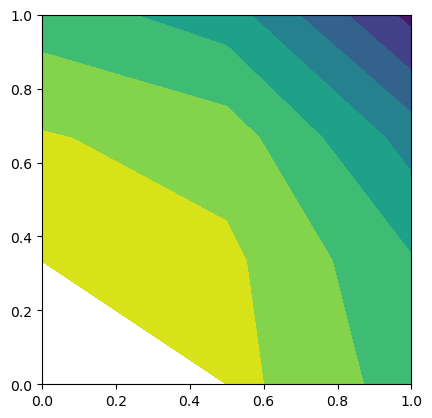

In [3]:
Nx, Ny = (3, 4)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
xv, yv = np.meshgrid(x, y, sparse=True)
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)
print(xv.shape)
print(yv.shape)
print(z.shape)
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

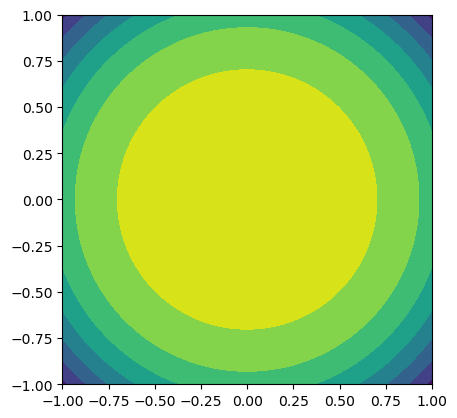

In [13]:
Nx, Ny = (100, 100)
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
xv, yv = np.meshgrid(x, y)#, sparse=True)
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)

h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

The multivariate Gaussian distribution of an n-dimensional vector

$x=(x_1,...,x_D)^T$ 

$\begin{equation*}
    p(x|\mu, \Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))
\end{equation*}   $

$\Sigma$ is the D×D covariance matrix,$\mu=(\mu_1,...,\mu_D)^T$

visualize the magnitude of $p(x|\mu, \Sigma)$ as a function of all the D dimensions requires a plot in D+1 dimensions

In [5]:
import numpy as np

def multi_gaussian(grid, mu, Sigma):
    """
    Return the multivariate Gaussian distribution on grid.
    grid is an array of variables (x_1, x_2, x_3, ..., x_k) constructed by packing them into a meshgrid
    """
    # Calculate the dimension of variables
    D = len(mu)
    
    # Calculate the determinant of the Covariance matrix
    det_Sigma = np.linalg.det(Sigma)
    
    # Calculate the inverse of the Covariance matrix
    inv_Sigma = np.linalg.inv(Sigma)
    
    # Initialize the denominator
    denominator = np.sqrt((2 * np.pi) ** D * det_Sigma)
    
    # Initialize an array to store the numerator values
    numerator = np.zeros_like(grid[0])
    
    # Calculate (x-mu)^T . Sigma^(-1) . (x-mu) for each point in the grid
    for i in range(D):
        for j in range(D):
            numerator += (grid[i] - mu[i]) * inv_Sigma[i][j] * (grid[j] - mu[j])
    
    # Calculate the exponent term
    exponent = -0.5 * numerator
    
    # Calculate the PDF
    pdf = np.exp(exponent) / denominator

    return pdf


### **Task:** Plot 2-dimensional Gaussian with 


1. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right]$, $ \mu = (0,0)^T$

In [6]:
import numpy as np

# Define the number of points and the range for the grid
N = 100  # You can adjust this to change the number of points
x_min, x_max = -5, 5  # Adjust the range as needed
y_min, y_max = -5, 5

# Create a grid of X and Y values
X = np.linspace(x_min, x_max, N)
Y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[1., 0], [0, 1]])

# Create a grid of D-dimensional points
grid = np.dstack((X, Y))

# Calculate the multivariate Gaussian PDF on the grid
pdf_values = multi_gaussian(grid, mu, Sigma)

# Now, pdf_values contains the PDF values for each point in the grid, and you can use a plotting library to visualize it.


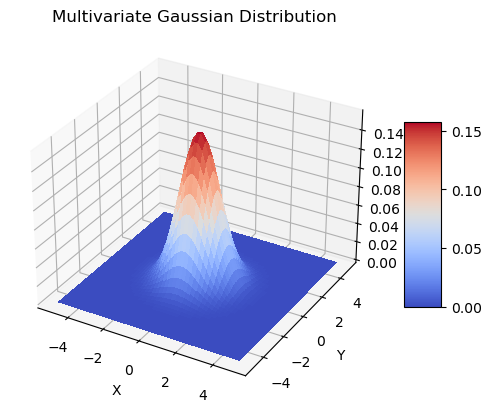

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define your multi_gaussian function with a specified grid size
def multi_gaussian(grid, mu, Sigma):
    # Calculate the PDF values for each point in the grid
    D = len(mu)
    det_Sigma = np.linalg.det(Sigma)
    inv_Sigma = np.linalg.inv(Sigma)
    denominator = (2 * np.pi) ** (D / 2) * np.sqrt(det_Sigma)
    
    # Calculate the numerator for each point in the grid
    numerator = np.zeros_like(grid[:, :, 0])
    for i in range(D):
        for j in range(D):
            numerator += (grid[:, :, i] - mu[i]) * inv_Sigma[i, j] * (grid[:, :, j] - mu[j])
    
    # Calculate the PDF values
    pdf_values = np.exp(-0.5 * numerator) / denominator

    return pdf_values

# Reduce the number of points for visualization
N = 50  # Adjust this value as needed

# Create a grid of X and Y values
x_min, x_max = -5, 5
y_min, y_max = -5, 5
X = np.linspace(x_min, x_max, N)
Y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[1., 0], [0, 1]])

# Create a grid of D-dimensional points
grid = np.dstack((X, Y))

# Calculate the multivariate Gaussian PDF on the grid
pdf_values = multi_gaussian(grid, mu, Sigma)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, pdf_values, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF Value')

# Set the title
plt.title('Multivariate Gaussian Distribution')

# Show the plot
plt.show()


2. 
$\Sigma = \left[\begin{array}{cc}
    1 & -1 \\
    -1 & 4
\end{array}\right]$,  $ \mu = (0,0)^T$


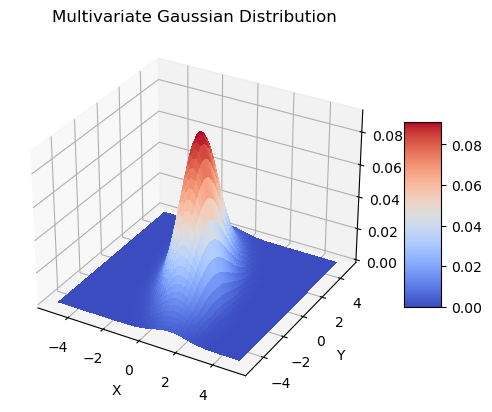

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define your multi_gaussian function with a specified grid size
def multi_gaussian(grid, mu, Sigma):
    # Calculate the PDF values for each point in the grid
    D = len(mu)
    det_Sigma = np.linalg.det(Sigma)
    inv_Sigma = np.linalg.inv(Sigma)
    denominator = (2 * np.pi) ** (D / 2) * np.sqrt(det_Sigma)
    
    # Calculate the numerator for each point in the grid
    numerator = np.zeros_like(grid[:, :, 0])
    for i in range(D):
        for j in range(D):
            numerator += (grid[:, :, i] - mu[i]) * inv_Sigma[i, j] * (grid[:, :, j] - mu[j])
    
    # Calculate the PDF values
    pdf_values = np.exp(-0.5 * numerator) / denominator

    return pdf_values

# Reduce the number of points for visualization
N = 50  # Adjust this value as needed

# Create a grid of X and Y values
x_min, x_max = -5, 5
y_min, y_max = -5, 5
X = np.linspace(x_min, x_max, N)
Y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[1., -1], [-1, 4]])

# Create a grid of D-dimensional points
grid = np.dstack((X, Y))

# Calculate the multivariate Gaussian PDF on the grid
pdf_values = multi_gaussian(grid, mu, Sigma)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, pdf_values, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF Value')

# Set the title
plt.title('Multivariate Gaussian Distribution')

# Show the plot
plt.show()


3. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 4
\end{array}\right]$,  $ \mu = (0,0)^T$


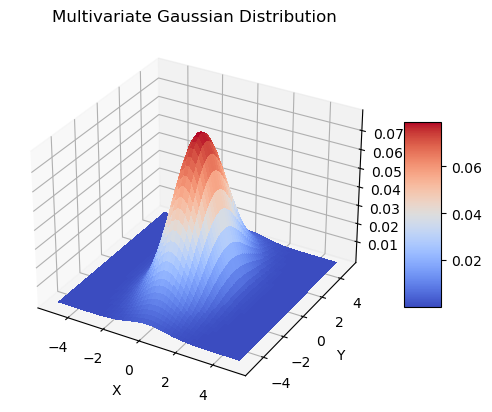

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define your multi_gaussian function with a specified grid size
def multi_gaussian(grid, mu, Sigma):
    # Calculate the PDF values for each point in the grid
    D = len(mu)
    det_Sigma = np.linalg.det(Sigma)
    inv_Sigma = np.linalg.inv(Sigma)
    denominator = (2 * np.pi) ** (D / 2) * np.sqrt(det_Sigma)
    
    # Calculate the numerator for each point in the grid
    numerator = np.zeros_like(grid[:, :, 0])
    for i in range(D):
        for j in range(D):
            numerator += (grid[:, :, i] - mu[i]) * inv_Sigma[i, j] * (grid[:, :, j] - mu[j])
    
    # Calculate the PDF values
    pdf_values = np.exp(-0.5 * numerator) / denominator

    return pdf_values

# Reduce the number of points for visualization
N = 50  # Adjust this value as needed

# Create a grid of X and Y values
x_min, x_max = -5, 5
y_min, y_max = -5, 5
X = np.linspace(x_min, x_max, N)
Y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[1., 0], [0, 4]])

# Create a grid of D-dimensional points
grid = np.dstack((X, Y))

# Calculate the multivariate Gaussian PDF on the grid
pdf_values = multi_gaussian(grid, mu, Sigma)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, pdf_values, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF Value')

# Set the title
plt.title('Multivariate Gaussian Distribution')

# Show the plot
plt.show()
